# オートエンコーダーとは

#### オートエンコーダーは与えられた画像群を自動的に圧縮及び復元を行うものである。オートエンコーダーが行う圧縮は非可逆圧縮であるため、復元された画像は多少粗くなっている。オートエンコーダーの実用的な用途は,データのノイズ除去とデータの視覚化に応用できる次元削減がある。視覚化においてはt-SNEの方が性能が良いらしい。

# オートエンコーダーを作る(MNIST)

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.3527 - val_loss: 0.2712
Epoch 2/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2637 - val_loss: 0.2523
Epoch 3/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.2409 - val_loss: 0.2280
Epoch 4/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2206 - val_loss: 0.2115 loss: 0.22
Epoch 5/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.2069 - val_loss: 0.1999
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1965 - val_loss: 0.1905
Epoch 7/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1879 - val_loss: 0.1826
Epoch 8/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1807 - val_loss: 0.1761
Epoch 9/50
60000/60000 [==============================] - 4s 61us/step - 

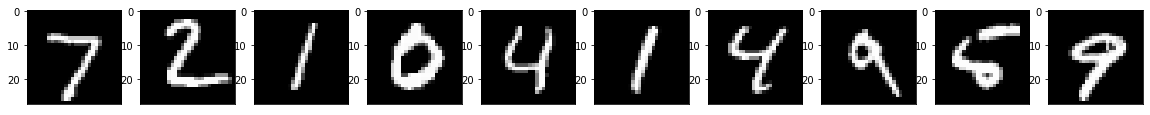

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32 #エンコードする次元を決めている
input_img = Input(shape=(784,))# MNISTは32*32=784次元なのでそれに合わせる
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train,x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
from keras import regularizers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Deep autoencoder

In [8]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64,activation='relu')(encoded)
encoded = Dense(32,activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

autoencoder.fit(x_train,x_train,epochs=100,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 113us/step - loss: 0.3600 - val_loss: 0.26460s - 
Epoch 2/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.2589 - val_loss: 0.2530
Epoch 3/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.2434 - val_loss: 0.2330
Epoch 4/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.2271 - val_loss: 0.2227
Epoch 5/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.2172 - val_loss: 0.2082
Epoch 6/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.2008 - val_loss: 0.1947
Epoch 7/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1907 - val_loss: 0.1864
Epoch 8/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.1827 - val_loss: 0.1775
Epoch 9/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1762 - val_los

60000/60000 [==============================] - 5s 81us/step - loss: 0.1046 - val_loss: 0.1019
Epoch 77/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1042 - val_loss: 0.1029
Epoch 78/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1041 - val_loss: 0.1027
Epoch 79/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1039 - val_loss: 0.1006
Epoch 80/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1036 - val_loss: 0.1021
Epoch 81/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1035 - val_loss: 0.1025
Epoch 82/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.1033 - val_loss: 0.1026
Epoch 83/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1031 - val_loss: 0.1015
Epoch 84/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.1028 - val_loss: 0.1028
Epoch 85/100
60000/60000 [========================

# Convolutional autoencoder

In [9]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28,28,1))

x = Conv2D(16,(3,3), activation='relu',padding='same')(input_img)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = MaxPooling2D((2,2),padding='same')(x)

x = Conv2D(8,(3,3), activation='relu',padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded =Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
decoded_imgs = autoencoder.predict(x_test)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2138 - val_loss: 0.1668
Epoch 2/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1528 - val_loss: 0.1437
Epoch 3/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1394 - val_loss: 0.1289
Epoch 4/50
60000/60000 [==============================] - 61s 1ms/step - loss: 0.1318 - val_loss: 0.1294
Epoch 5/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.1267 - val_loss: 0.1227
Epoch 6/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1232 - val_loss: 0.1225
Epoch 7/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1201 - val_loss: 0.1154
Epoch 8/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1180 - val_loss: 0.1183
Epoch 9/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1163 - val_loss: 0.1131
Epoch

ValueError: num must be 1 <= num <= 20, not 0

<Figure size 1440x288 with 0 Axes>

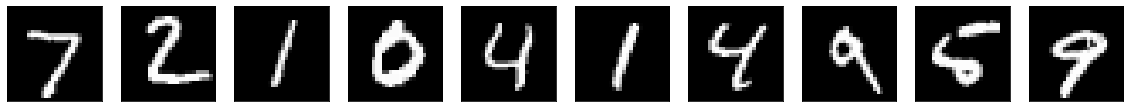

ValueError: cannot reshape array of size 32 into shape (4,32)

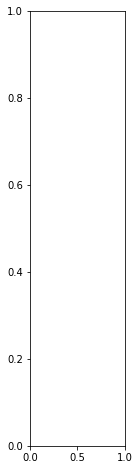

In [11]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

n = 10
plt.figure(figsize=(20,8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4,4*8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Application to image denoising

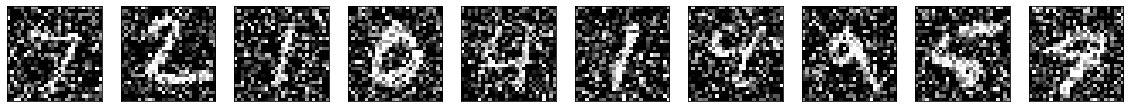

In [15]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
(x_train, _), (x_test,_) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 出力にノイズが混ざっている

In [14]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                histogram_freq=0, write_graph=False)])
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., std=epsilon_std)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1845 - val_loss: 0.1281
Epoch 2/100
60000/60000 [==============================] - 119s 2ms/step - loss: 0.1212 - val_loss: 0.1155
Epoch 3/100
60000/60000 [==============================] - 116s 2ms/step - loss: 0.1126 - val_loss: 0.1081
Epoch 4/100
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1084 - val_loss: 0.1058
Epoch 5/100
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1059 - val_loss: 0.1061
Epoch 6/100
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1043 - val_loss: 0.1025
Epoch 7/100
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1032 - val_loss: 0.1033
Epoch 8/100
60000/60000 [==============================] - 117s 2ms/step - loss: 0.1021 - val_loss: 0.1009
Epoch 9/100
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1014 - val_

60000/60000 [==============================] - 130s 2ms/step - loss: 0.0946 - val_loss: 0.0949
Epoch 77/100
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0946 - val_loss: 0.0948
Epoch 78/100
60000/60000 [==============================] - 132s 2ms/step - loss: 0.0947 - val_loss: 0.0946
Epoch 79/100
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0946 - val_loss: 0.0945
Epoch 80/100
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0945 - val_loss: 0.0952
Epoch 81/100
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0945 - val_loss: 0.0946
Epoch 82/100
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0945 - val_loss: 0.0941
Epoch 83/100
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0945 - val_loss: 0.0941
Epoch 84/100
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0945 - val_loss: 0.0939
Epoch 85/100
60000/60000 [===============

NameError: name 'batch_size' is not defined

# Sequence-to-Sequence autoencoder

In [12]:
from keras.layers import Input, LSTM, RepeatVector
from keras.models import Model

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(latent_dim)(inputs)

decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

NameError: name 'timesteps' is not defined

# Variational autoencoder

In [13]:
from keras.models import Model
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import backend as K

x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim),
                              mean=0., std=epsilon_std)
    return z_mean + K.exp(z_log_sigma) * epsilon

# note that "output_shape" isn't necessary with the TensorFlow backend
# so you could write `Lambda(sampling)([z_mean, z_log_sigma])`
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# end-to-end autoencoder
vae = Model(x, x_decoded_mean)

# encoder, from inputs to latent space
encoder = Model(x, z_mean)

# generator, from latent space to reconstructed inputs
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

vae.compile(optimizer='rmsprop', loss=vae_loss)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

NameError: name 'batch_size' is not defined

# fashion mnistにオートエンコーダー

In [3]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train,x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()

from keras import regularizers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.5287 - val_loss: 0.4572
Epoch 2/50
60000/60000 [==============================] - 4s 59us/step - loss: 0.4272 - val_loss: 0.4080
Epoch 3/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3979 - val_loss: 0.3910
Epoch 4/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3819 - val_loss: 0.3761
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.3680 - val_loss: 0.3638
Epoch 6/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.3564 - val_loss: 0.3532
Epoch 7/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.3468 - val_loss: 0.3446
Epoch 8/50
60000/60000 [==============================] - 5s 77us/step - loss:

<Figure size 2000x400 with 10 Axes>

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()

# エンコーダーデコーダー共に1層の簡単な構成ではあるが、それなりに復元できている。

# CIFAR10に対してオートエンコーダーを構築

In [ ]:
import keras
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
from keras.datasets import mnist
import numpy as np
(x_train, _),(x_test, _) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')/ 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
autoencoder.fit(x_train,x_train,
               epochs=50,
               batch_size=256,
               shuffle=True,
               validation_data=(x_test,x_test))
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
plt.show()

from keras import regularizers
encoding_dim = 32

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)